In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("/content/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


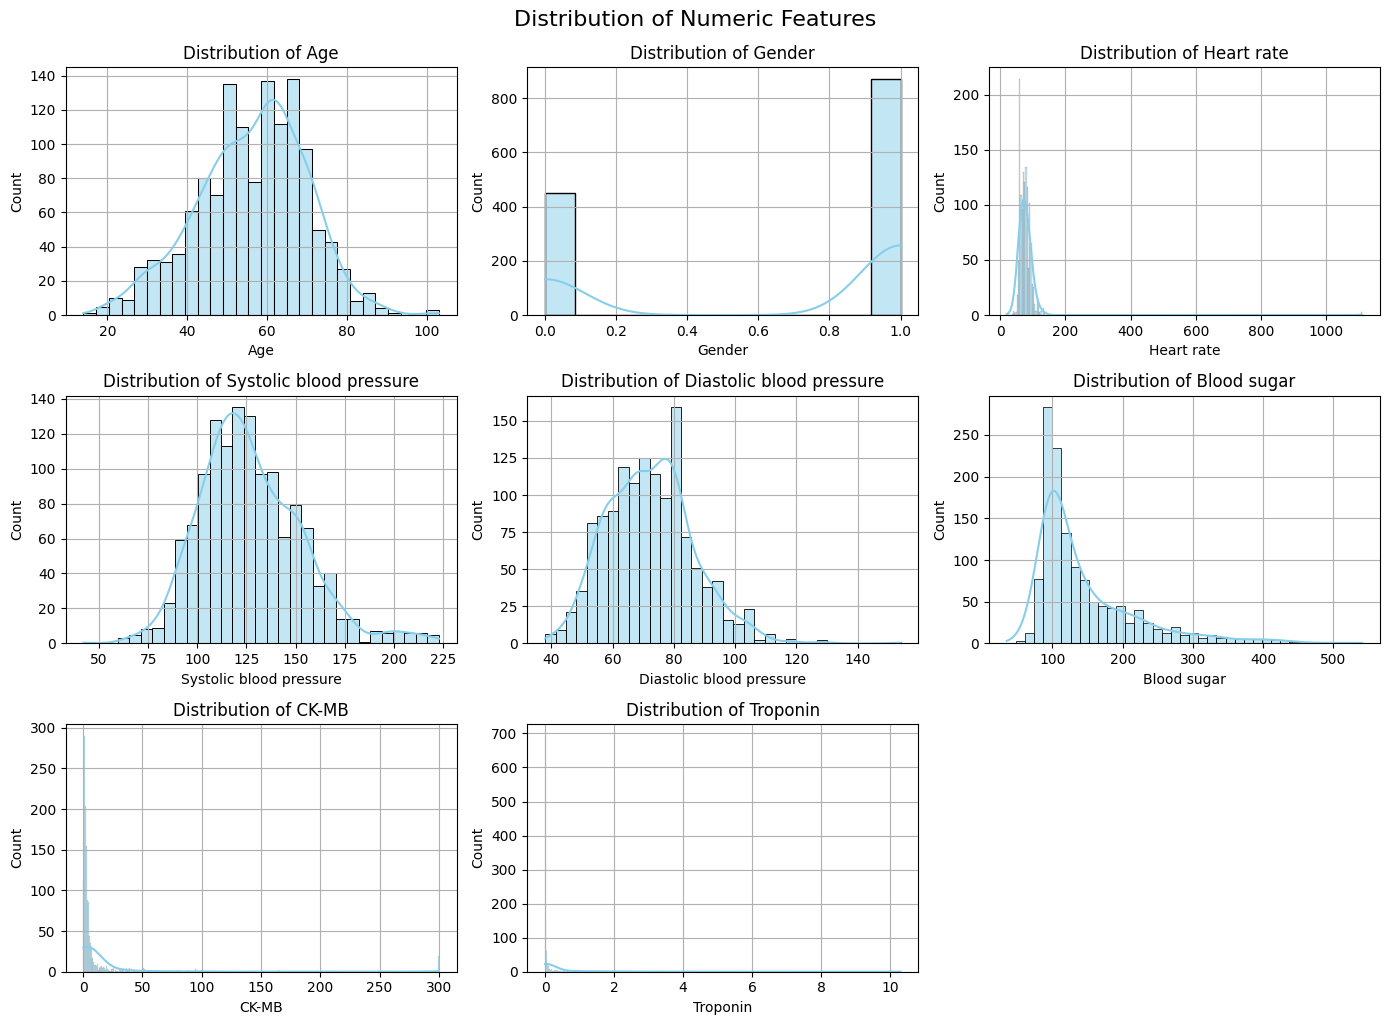

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the categorical column 'Result'
numeric_features = ["Age", "Gender", "Heart rate", "Systolic blood pressure",
                    "Diastolic blood pressure", "Blood sugar",
                    "CK-MB", "Troponin"]

plt.figure(figsize=(14, 10))  # Adjusted figure size for clarity
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Distribution of Numeric Features", fontsize=16, y=1.02)
plt.show()


**Categorical Feature**

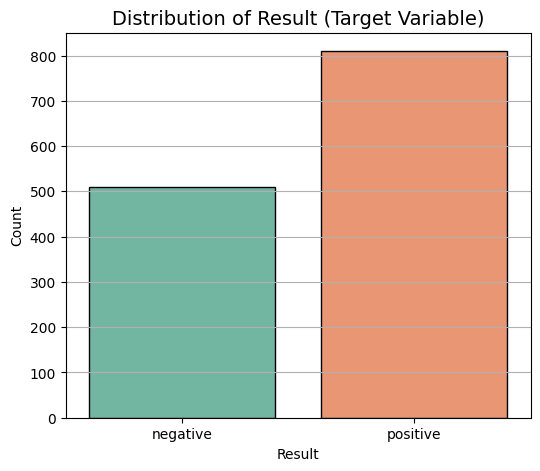

In [7]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Result", palette="Set2", edgecolor='black')
plt.title("Distribution of Result (Target Variable)", fontsize=14)
plt.xlabel("Result")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


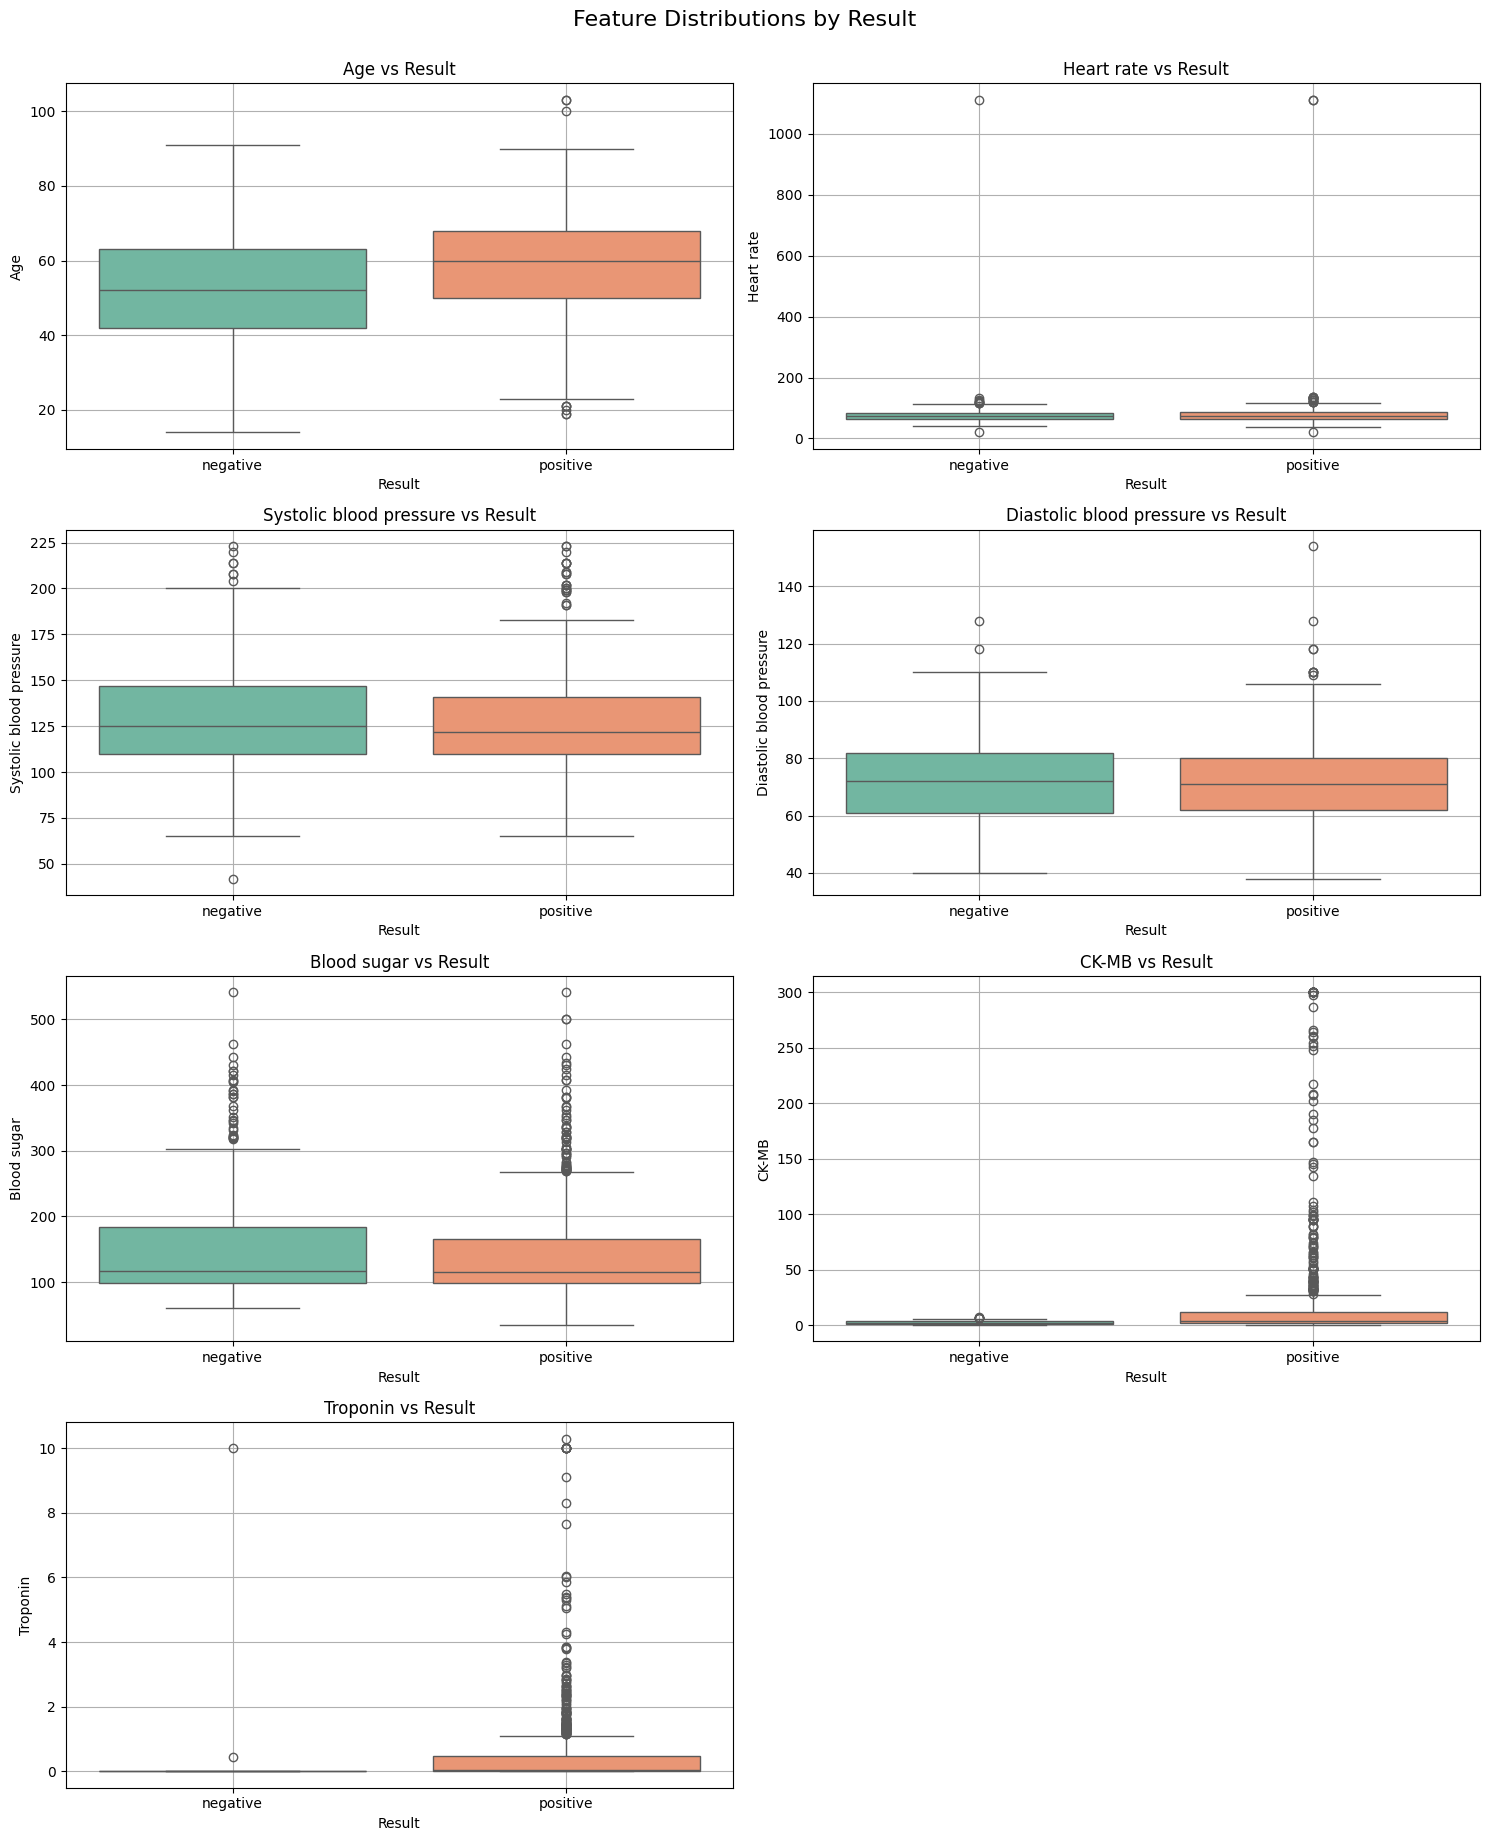

In [8]:

# List of numeric features (excluding 'Result')
numeric_features = ["Age", "Heart rate", "Systolic blood pressure",
                    "Diastolic blood pressure", "Blood sugar",
                    "CK-MB", "Troponin"]

plt.figure(figsize=(15, 18))

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x="Result", y=feature, palette="Set2")
    plt.title(f"{feature} vs Result", fontsize=12)
    plt.xlabel("Result")
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Feature Distributions by Result", fontsize=16, y=1.02)
plt.show()


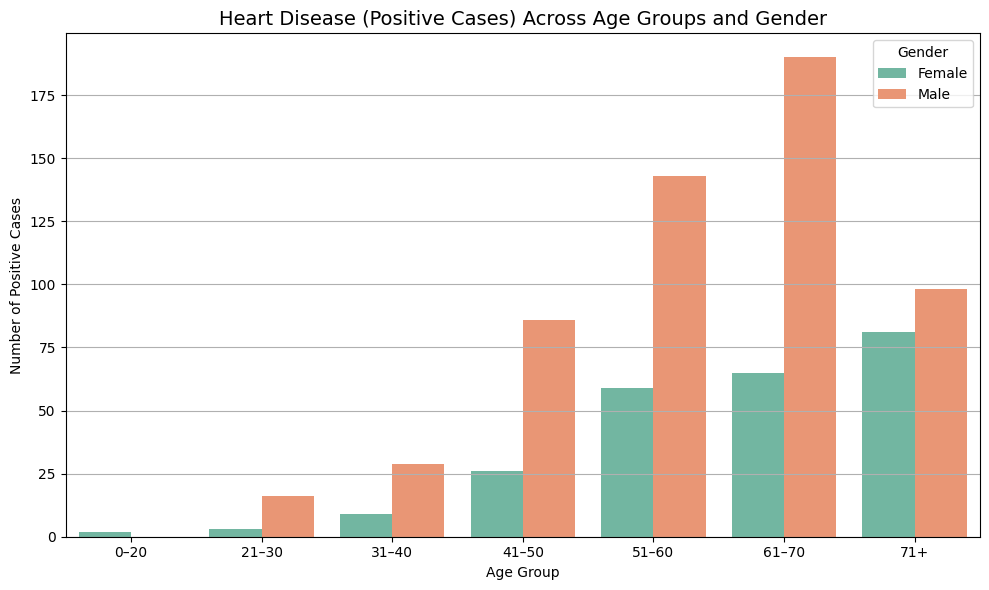

In [16]:
df1 = df.copy()

# Step 1: Define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71+']
df1['Age Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)

# Step 2: Map gender from numeric to categorical (if 1=Male, 0=Female assumed)
df1['Gender'] = df1['Gender'].map({1: 'Male', 0: 'Female'})

# Step 3: Filter only positive cases (heart disease)
positive_cases = df1[df1['Result'] == 'positive']

# Step 4: Group by Age Group and Gender
grouped = positive_cases.groupby(['Age Group', 'Gender']).size().reset_index(name='Count')

# Step 5: Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age Group', y='Count', hue='Gender', palette='Set2')
plt.title('Heart Disease (Positive Cases) Across Age Groups and Gender', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Number of Positive Cases')
plt.grid(axis='y')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


Feature Interaction

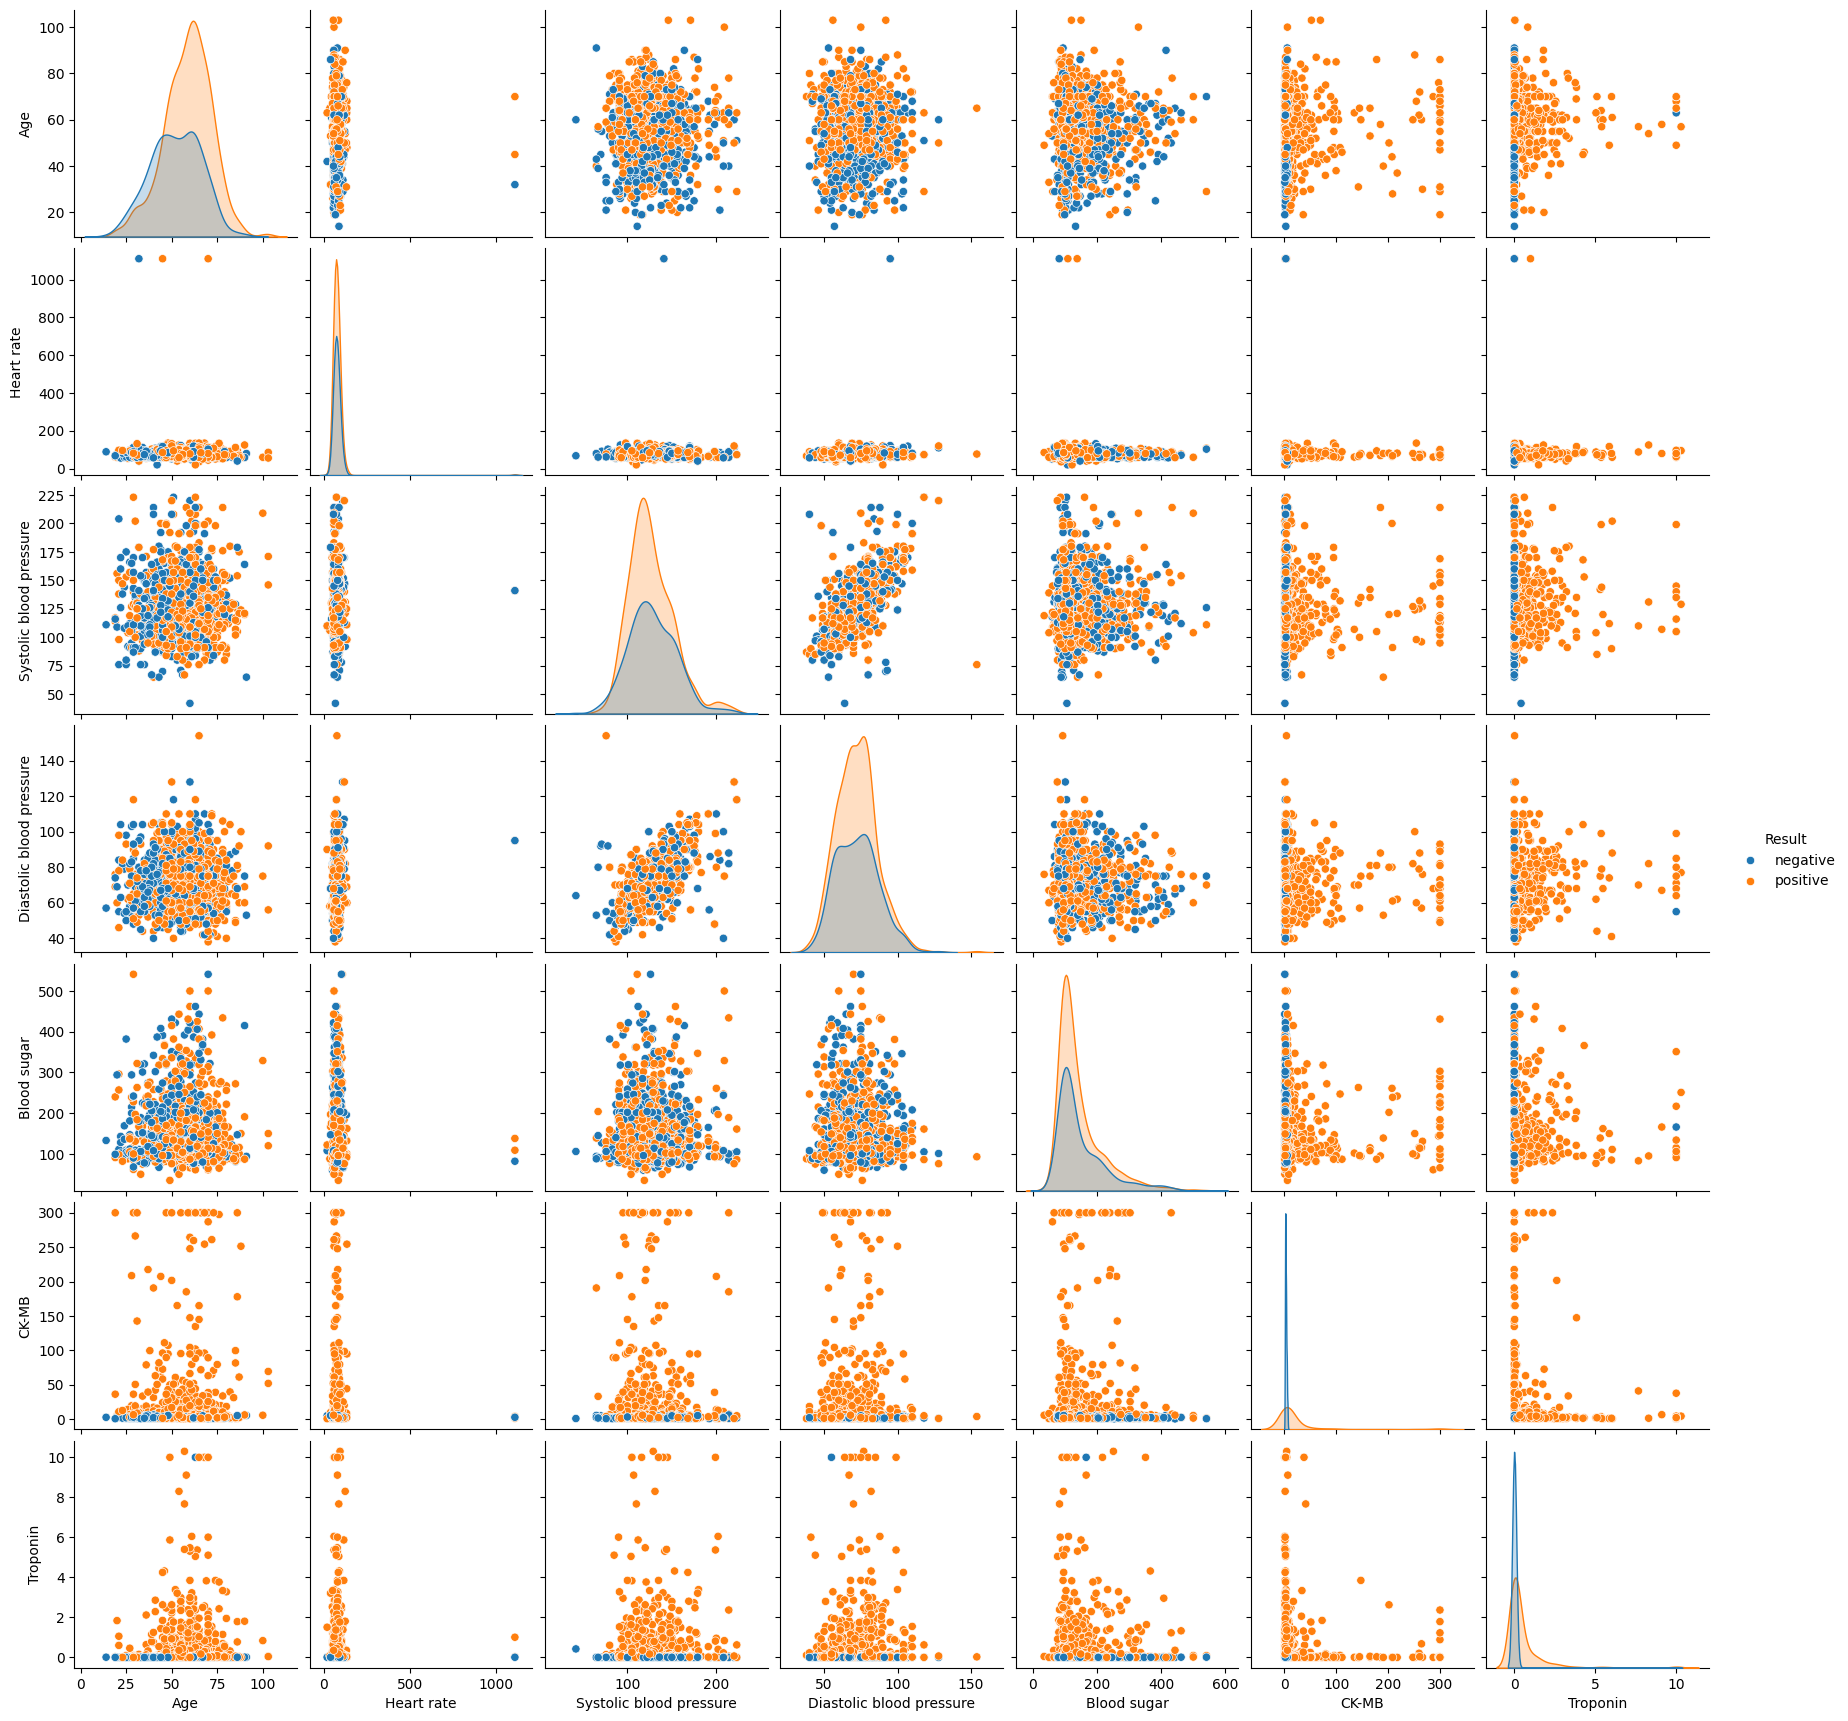

In [17]:
sns.pairplot(df1, hue="Result", diag_kind="kde")
plt.show()

In [18]:
print(df["Gender"])

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    1
1316    1
1317    1
1318    1
Name: Gender, Length: 1319, dtype: int64


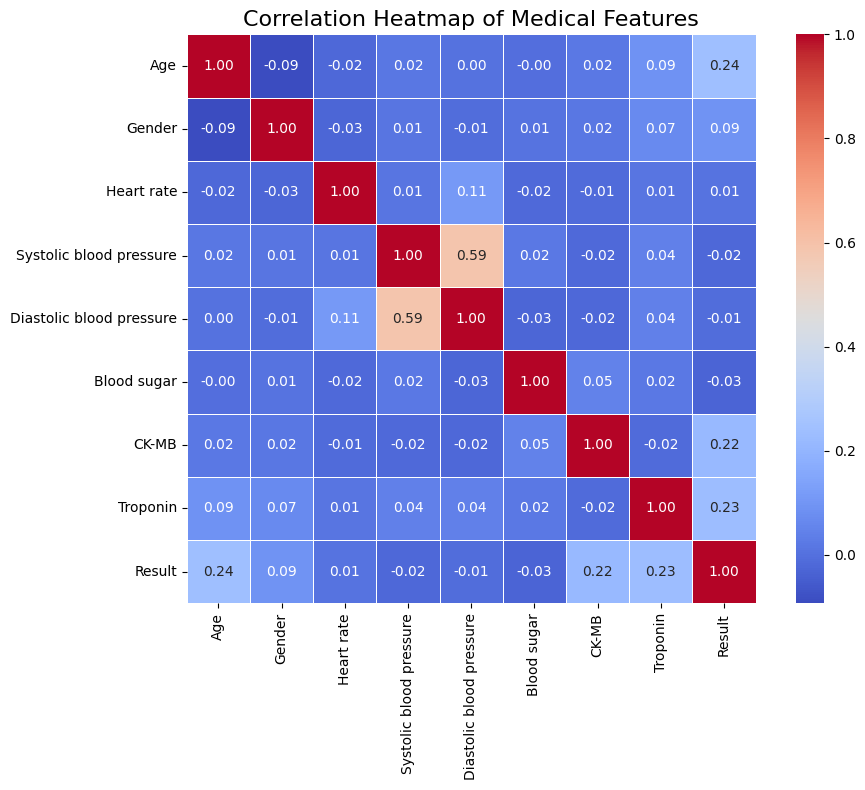

In [19]:
# Make a copy of the dataframe
df_corr = df.copy()

# Convert 'Result' to numeric (if not already)
df_corr['Result'] = df_corr['Result'].map({'negative': 0, 'positive': 1})

# Select only numeric features
numeric_cols = ["Age", "Gender", "Heart rate", "Systolic blood pressure",
                "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin", "Result"]

# Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Medical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [20]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB
